In [1]:
pip install --upgrade tensorflow

In [2]:
import keras
import tensorflow
import matplotlib as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("1429_1.csv", on_bad_lines='skip')
print(df.head())

<ipython-input-3-1703f87a709c>:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("1429_1.csv", on_bad_lines='skip')


                     id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  84

In [4]:
print(df.describe())


        reviews.id  reviews.numHelpful  reviews.rating  reviews.userCity  \
count          1.0        34131.000000    34627.000000               0.0   
mean   111372787.0            0.630248        4.584573               NaN   
std            NaN           13.215775        0.735653               NaN   
min    111372787.0            0.000000        1.000000               NaN   
25%    111372787.0            0.000000        4.000000               NaN   
50%    111372787.0            0.000000        5.000000               NaN   
75%    111372787.0            0.000000        5.000000               NaN   
max    111372787.0          814.000000        5.000000               NaN   

       reviews.userProvince  
count                   0.0  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN  


In [5]:
print("Total :",df['reviews.rating'].value_counts())

Total : reviews.rating
5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: count, dtype: int64


In [6]:
# Seleccionar dos columnas específicas
df = df[['reviews.rating', 'reviews.text']]

print(df)

       reviews.rating                                       reviews.text
0                 5.0  This product so far has not disappointed. My c...
1                 5.0  great for beginner or experienced person. Boug...
2                 5.0  Inexpensive tablet for him to use and learn on...
3                 4.0  I've had my Fire HD 8 two weeks now and I love...
4                 5.0  I bought this for my grand daughter when she c...
...               ...                                                ...
34655             3.0  This is not appreciably faster than any other ...
34656             1.0  Amazon should include this charger with the Ki...
34657             1.0  Love my Kindle Fire but I am really disappoint...
34658             1.0  I was surprised to find it did not come with a...
34659             1.0  to spite the fact that i have nothing but good...

[34660 rows x 2 columns]


In [7]:
df = df.dropna()

In [8]:
review= []
sentences = list(df['reviews.text'])
for sen in sentences:
    review.append(sen)

In [9]:
labels = df['reviews.rating'].astype(str)

In [10]:
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.2)

In [11]:
#Parameters
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [12]:
print("Valores únicos en train_labels:", train_labels.unique())
print("Valores únicos en test_labels:", test_labels.unique())


Valores únicos en train_labels: ['4.0' '2.0' '5.0' '3.0' '1.0']
Valores únicos en test_labels: ['4.0' '5.0' '2.0' '3.0' '1.0']


In [22]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from nltk.corpus import stopwords
import nltk

# Descargar stopwords si es necesario
nltk.download('stopwords')

# Supongo que ya tienes un DataFrame llamado 'df' con las columnas 'reviews.text' y 'reviews.rating'

# Preprocesamiento de datos
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convertir a minúsculas y eliminar stopwords
    return ' '.join([word for word in text.lower().split() if word not in stop_words])

df['cleaned_text'] = df['reviews.text'].apply(preprocess_text)

# Convertir etiquetas a formato numérico
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['reviews.rating'])

# Dividir los datos en entrenamiento y prueba
train_sentences, test_sentences, train_labels, test_labels = train_test_split(df['cleaned_text'], labels, test_size=0.2)

# Vectorización usando TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
train_vectors = tfidf_vectorizer.fit_transform(train_sentences).toarray()
test_vectors = tfidf_vectorizer.transform(test_sentences).toarray()

# Convertir etiquetas a "one-hot encoded"
train_labels_one_hot = to_categorical(train_labels, num_classes=5)
test_labels_one_hot = to_categorical(test_labels, num_classes=5)

# Modelo simple de red neuronal para trabajar con datos vectorizados
model = tf.keras.Sequential([
    tf.keras.layers.Dense(516, activation='relu', input_shape=(train_vectors.shape[1],)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compilación del modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenamiento del modelo
num_epochs = 10
history = model.fit(train_vectors, train_labels_one_hot, epochs=num_epochs, validation_data=(test_vectors, test_labels_one_hot))

# Evaluación del modelo (opcional)
results = model.evaluate(test_vectors, test_labels_one_hot, verbose=2)
print("Test Loss, Test Accuracy:", results)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 516)                 │       5,160,516 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 516)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 256)                 │         132,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,334,345 (20.35 MB)

 Trainable params: 5,334,345 (20.35 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
866/866 ━━━━━━━━━━━━━━━━━━━━ 69s 77ms/step - accuracy: 0.6817 - loss: 0.8527 - val_accuracy: 0.7137 - val_loss: 0.7271
Epoch 2/10
866/866 ━━━━━━━━━━━━━━━━━━━━ 105s 105ms/step - accuracy: 0.7409 - loss: 0.6363 - val_accuracy: 0.7159 - val_loss: 0.7156
Epoch 3/10
866/866 ━━━━━━━━━━━━━━━━━━━━ 76s 87ms/step - accuracy: 0.7966 - loss: 0.5082 - val_accuracy: 0.6790 - val_loss: 0.8675
Epoch 4/10
866/866 ━━━━━━━━━━━━━━━━━━━━ 74s 78ms/step - accuracy: 0.8686 - loss: 0.3371 - val_accuracy: 0.6642 - val_loss: 1.0621
Epoch 5/10
866/866 ━━━━━━━━━━━━━━━━━━━━ 84s 80ms/step - accuracy: 0.9340 - loss: 0.1800 - val_accuracy: 0.6567 - val_loss: 1.4414
Epoch 6/10
866/866 ━━━━━━━━━━━━━━━━━━━━ 77s 75ms/step - accuracy: 0.9594 - loss: 0.1129 - val_accuracy: 0.6857 - val_loss: 1.7462
Epoch 7/10
866/866 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.9750 - loss: 0.0762 - val_accuracy: 0.6470 - val_loss: 1.7778
Epoch 8/10
866/866 ━━━━━━━━━━━━━━━━━━━━ 83s 76ms/step - accuracy: 0.9768 - loss: 0.0653 

217/217 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step


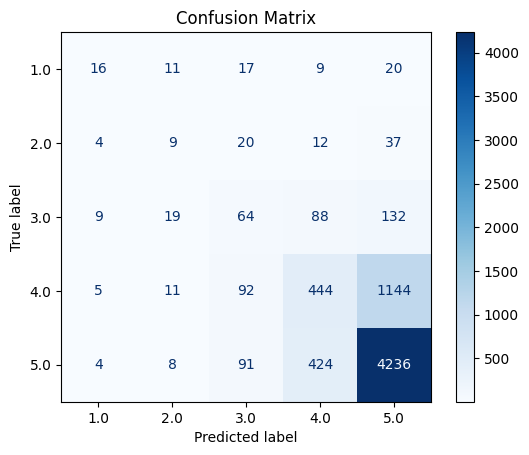

<ipython-input-23-031d9e626f3d>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=errors, palette='viridis')


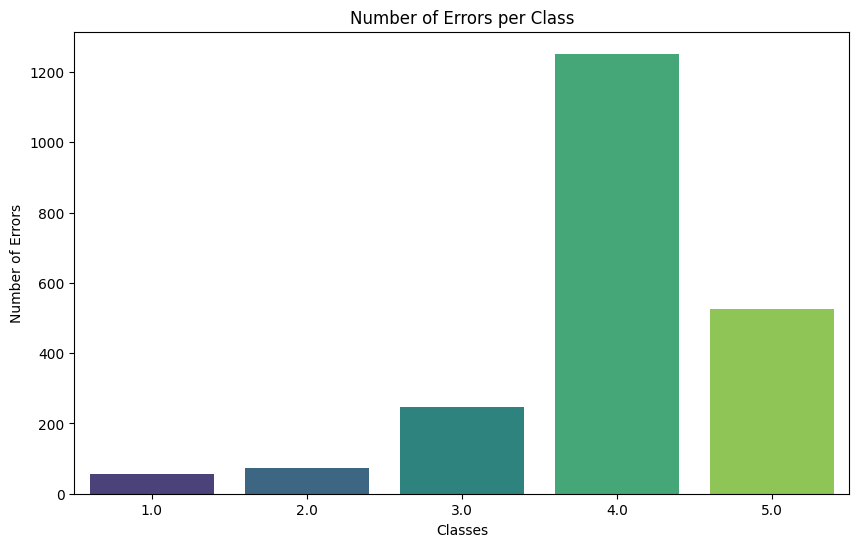

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Predicciones del modelo
y_pred = model.predict(test_vectors)
y_pred_classes = y_pred.argmax(axis=1)
y_true = test_labels

# Crear matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Mostrar matriz de confusión
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Diagrama de barras de los errores
errors = cm.sum(axis=1) - cm.diagonal()  # Total de errores por clase
classes = label_encoder.classes_

plt.figure(figsize=(10, 6))
sns.barplot(x=classes, y=errors, palette='viridis')
plt.xlabel('Classes')
plt.ylabel('Number of Errors')
plt.title('Number of Errors per Class')
plt.show()


In [ ]:
# prompt: xticklabels=classifier.labels(), yticklabels=classifier.labels()
# adaptalo para una red neuronal

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'predicted_labels' and 'true_labels' are defined from the previous code

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels (assuming binary classification)
class_labels = ["0", "1","2", "3","4"]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Fill matrix with values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [ ]:
# Visualización del historial
pd.DataFrame(history.history).plot()

# Evaluación del modelo
y_pred_prob = model.predict(test_padded)
y_pred_classes = (y_pred_prob > 0.5).astype("int32")

cm = confusion_matrix(test_labels, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusión")
plt.show()

f1 = f1_score(test_labels, y_pred_classes)
print(f"F1 Score: {f1}")

auc = roc_auc_score(test_labels, y_pred_prob)
print(f"AUC-ROC: {auc}")

fpr, tpr, _ = roc_curve(test_labels, y_pred_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()